### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [3]:
entry_data.info()
print()
sales_data.info()
print()
item_data.info()
print()
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1

### 월별 매출액 추세(sales_data를 이용합니다.)  
월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.  
힌트: groupby() 함수를 사용하세요.

In [4]:
temp_var = sales_data
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [5]:
temp_var['date'] = temp_var["결제일시"].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [6]:
temp_var.replace({"결제금액" : {",", ""}})
# replace 함수는 '완벽하게' 일치하는 문자열만 변경하기 때문입니다

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [7]:
temp_var["결제금액"].str.replace(",", "")
temp_var
#repalce 함수는 변수에 저장하지 않으면 그대로 소멸

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [8]:
temp_var["결제금액"] = temp_var["결제금액"].str.replace(",", "")
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [9]:
temp_var.dtypes

결제일시    object
판매위치    object
상품명     object
결제방식    object
비고      object
판매수량     int64
결제금액    object
고객      object
date    object
dtype: object

In [10]:
temp_var.astype({'결제금액' : 'int64'})

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [11]:
temp_var.dtypes
#dtypes 도 변수에 저장 해야 할듯.

결제일시    object
판매위치    object
상품명     object
결제방식    object
비고      object
판매수량     int64
결제금액    object
고객      object
date    object
dtype: object

In [12]:
temp_var = temp_var.astype({'결제금액' : 'int64'})

In [13]:
temp_var.dtypes

결제일시    object
판매위치    object
상품명     object
결제방식    object
비고      object
판매수량     int64
결제금액     int64
고객      object
date    object
dtype: object

In [14]:
temp_var["결제금액"].groupby(temp_var['date']).sum()

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

https://zephyrus1111.tistory.com/178  
참조하여서 y축 단위 변경

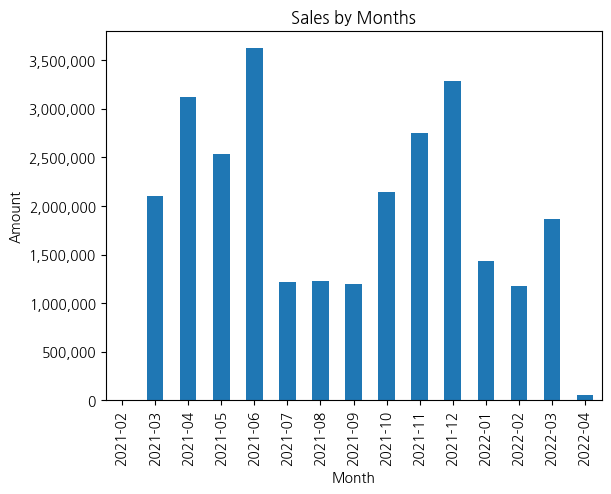

In [31]:
import warnings
warnings.filterwarnings('ignore')


image = temp_var["결제금액"].groupby(temp_var['date']).sum().plot(kind = 'bar')


n = 20
data=np.random.normal(loc=10000,size=n, scale=10000) + 100000

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])




plt.title("Sales by Months")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()

### 가장 인기 있는 음식/음료(salses_data를 이용합니다.)  
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [16]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [17]:
temp_var["상품명"].value_counts()

김치볶음밥           1211
라면               756
짜장라면             457
치즈불고기볶음밥         423
계란추가             315
                ... 
녹차(HOT)            1
짜장라면(계란추가)         1
이어폰(커널형)           1
오늘은 한돈고추장불고기       1
오늘은 한돈간장불고기        1
Name: 상품명, Length: 100, dtype: int64

In [18]:
temp_var["상품명"].value_counts().sum()

7105

In [19]:
group1 = temp_var["상품명"].groupby(temp_var["판매수량"] <= 1).value_counts()
group1

판매수량  상품명         
True  김치볶음밥           1211
      라면               756
      짜장라면             457
      치즈불고기볶음밥         423
      계란추가             315
                      ... 
      라면(계란/치즈추가)        1
      오늘은 한돈간장불고기        1
      오늘은 한돈고추장불고기       1
      이어폰(커널형)           1
      짜장라면(계란추가)         1
Name: 상품명, Length: 100, dtype: int64

In [20]:
temp_var["판매수량"] <= 1

0       True
1       True
2       True
3       True
4       True
        ... 
7100    True
7101    True
7102    True
7103    True
7104    True
Name: 판매수량, Length: 7105, dtype: bool

In [21]:
type(group1)

pandas.core.series.Series

2시간 30분 정도 걸렸다.  
그 시간을 거쳐 원하는 값을 찾았지만  
아직도 왜 <= 1 해야하는 이유를 아직도 모른다.  
그리고 또한 아직도 True가 거슬린다.  
판매수량 위치를 상품명 오른쪽으로 겪하게 옮기고 싶다.

In [22]:
#pd.DataFrame()
group1 = pd.DataFrame(group1).head(10)
group1

상품명
판매수량 상품명             
True 김치볶음밥       1211
     라면           756
     짜장라면         457
     치즈불고기볶음밥     423
     계란추가         315
     낙지볶음밥        314
     아메리카노(ICE)   314
     새우볶음밥        311
     치즈감자튀김       247
     감자튀김         242

In [29]:
group1[:10]

상품명
판매수량 상품명             
True 김치볶음밥       1211
     라면           756
     짜장라면         457
     치즈불고기볶음밥     423
     계란추가         315
     낙지볶음밥        314
     아메리카노(ICE)   314
     새우볶음밥        311
     치즈감자튀김       247
     감자튀김         242

In [23]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (True, '김치볶음밥') to (True, '감자튀김')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   상품명     10 non-null     int64
dtypes: int64(1)
memory usage: 1.2+ KB


https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=wideeyed&logNo=221225208497  
처음 시도해본 한글폰트 설정

https://pinkwink.kr/990  
두번째 시도해본 한글 폰트 설정

https://github.com/seongminp/koreanize-matplotlib  
최종

In [ ]:
# import matplotlib.pyplot as plt
# import koreanize_matplotlib

# from matplotlib import rc
# import matplotlib.font_manager as fm

# plt.rc('font', family = 'NanumGothicOTF')
# print(plt.rcParams['font.family'])

# %matplotlib inline

In [25]:
pip install koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

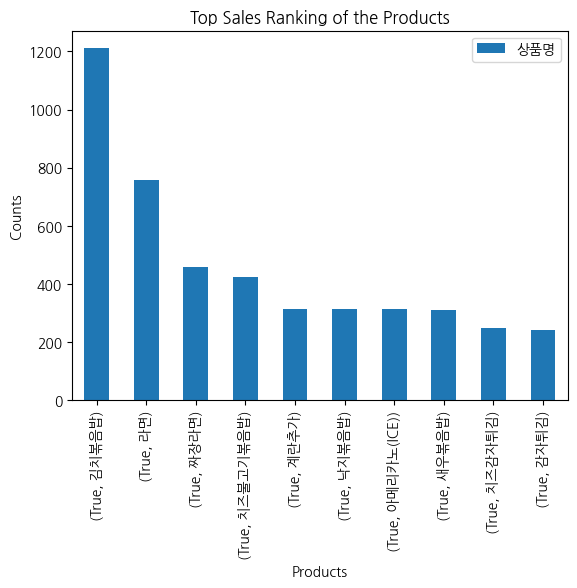

In [153]:
# fig = plt.figure()
# image2 = fig.add_subplot(4, 4, 10)

# image2.bar(group1)
image2 = group1.plot(kind = "bar")



plt.title("Top Sales Ranking of the Products")
plt.xlabel("Products")
plt.ylabel("Counts")

plt.show()

조금 더 이쁘게 표현 하고 싶어하였으나 실패.

In [37]:
ax = sns.barplot(data = group1.reset_index(), x = "Products", y = "Count", hue = "상품명")

plt.title("the Sales Rankings of the Products")
plt.show()
#ValueError: cannot insert 상품명, already exists

ValueError: cannot insert 상품명, already exists

### 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)  
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [40]:
temp_var2 = entry_data
temp_var2.tail()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22554,종일요금제,2021-02-17 12:58,2021-02-17 14:19,오전 1:21:00,선불기1,7000,퇴실,customer774105


In [41]:
temp_var2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


temp_var2["요금제명"].groupby(temp_var2["금액"]).sum()  
거꾸로하니까 글씨가 날아다녀서 무서웠다.

In [45]:
price = temp_var2["금액"].groupby(temp_var2["요금제명"])

In [46]:
price.sum()

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [47]:
price.count()

요금제명
18시이후 무제한            251
1시간                   36
1시간 요금제                7
3시간                    3
기간권                 1034
무제한 입장권              198
무제한(일반요금)              1
무제한(한국대생)              2
시간 요금제(1시간당)          10
시간권                  138
시간요금제                  2
시간요금제(1시간)          1048
시간요금제(1시간당)            9
시간요금제(3시간)           289
심야-조조무제한            1223
심야-조조무제한(06시까지)     2320
이용권                   14
입장권(종일권)            3498
조조무제한                161
종일요금제                 37
한국대생 무제한 입장권         714
한국대생 입장권(종일권)      11297
Name: 금액, dtype: int64

In [48]:
price_d = price.count().sort_values(ascending = False)
price_d

요금제명
한국대생 입장권(종일권)      11297
입장권(종일권)            3498
심야-조조무제한(06시까지)     2320
심야-조조무제한            1223
시간요금제(1시간)          1048
기간권                 1034
한국대생 무제한 입장권         714
시간요금제(3시간)           289
18시이후 무제한            251
무제한 입장권              198
조조무제한                161
시간권                  138
종일요금제                 37
1시간                   36
이용권                   14
시간 요금제(1시간당)          10
시간요금제(1시간당)            9
1시간 요금제                7
3시간                    3
시간요금제                  2
무제한(한국대생)              2
무제한(일반요금)              1
Name: 금액, dtype: int64

value_counts() 사용해 달라고 했다.  
완전히 까먹었다.

In [49]:
price.value_counts()

요금제명             금액  
18시이후 무제한        4500      69
                 5000      68
                 5500      46
                 6500      38
                 6000      30
1시간              2500      36
1시간 요금제          2000       7
3시간              7000       3
기간권              0       1034
무제한 입장권          7900      64
                 7400      49
                 8900      33
                 8400      27
                 6900      20
                 8600       4
                 7500       1
무제한(일반요금)        6000       1
무제한(한국대생)        7000       2
시간 요금제(1시간당)     2500      10
시간권              0        138
시간요금제            5900       1
                 6400       1
시간요금제(1시간)       2500     957
                 3000      91
시간요금제(1시간당)      2500       9
시간요금제(3시간)       7000     270
                 8000      19
심야-조조무제한         5000    1117
                 6000     106
심야-조조무제한(06시까지)  5000    2320
이용권              0         14
입장권(종일권)         6500    1116
                 6

In [50]:
price1 = price.value_counts()
price1

요금제명             금액  
18시이후 무제한        4500      69
                 5000      68
                 5500      46
                 6500      38
                 6000      30
1시간              2500      36
1시간 요금제          2000       7
3시간              7000       3
기간권              0       1034
무제한 입장권          7900      64
                 7400      49
                 8900      33
                 8400      27
                 6900      20
                 8600       4
                 7500       1
무제한(일반요금)        6000       1
무제한(한국대생)        7000       2
시간 요금제(1시간당)     2500      10
시간권              0        138
시간요금제            5900       1
                 6400       1
시간요금제(1시간)       2500     957
                 3000      91
시간요금제(1시간당)      2500       9
시간요금제(3시간)       7000     270
                 8000      19
심야-조조무제한         5000    1117
                 6000     106
심야-조조무제한(06시까지)  5000    2320
이용권              0         14
입장권(종일권)         6500    1116
                 6

In [51]:
price1.info()
#Series' object has no attribute 'info'

AttributeError: 'Series' object has no attribute 'info'

sort_values -> Sort by the values.
sort_index -> Sort Series by index labels.

In [62]:
price1.sort_values(ascending = False)
#판매한 갯수가 많은 순으로 나열

요금제명             금액  
한국대생 입장권(종일권)    6000    3985
                 5500    2817
심야-조조무제한(06시까지)  5000    2320
한국대생 입장권(종일권)    6500    2151
심야-조조무제한         5000    1117
입장권(종일권)         6500    1116
한국대생 입장권(종일권)    7500    1096
                 7000    1096
기간권              0       1034
시간요금제(1시간)       2500     957
입장권(종일권)         6000     780
                 7000     721
                 7500     412
                 8000     368
시간요금제(3시간)       7000     270
한국대생 무제한 입장권     7400     236
                 6900     173
한국대생 입장권(종일권)    5000     152
시간권              0        138
한국대생 무제한 입장권     6400     127
조조무제한            4000     112
심야-조조무제한         6000     106
입장권(종일권)         5500     101
한국대생 무제한 입장권     8400      96
시간요금제(1시간)       3000      91
한국대생 무제한 입장권     7900      80
18시이후 무제한        4500      69
                 5000      68
무제한 입장권          7900      64
                 7400      49
조조무제한            5000      49
18시이후 무제한        5500      46
                 6

In [60]:
price1.sort_index(ascending = True)
#요금제명 순서를 차례대로 나열

요금제명             금액  
18시이후 무제한        4500      69
                 5000      68
                 5500      46
                 6000      30
                 6500      38
1시간              2500      36
1시간 요금제          2000       7
3시간              7000       3
기간권              0       1034
무제한 입장권          6900      20
                 7400      49
                 7500       1
                 7900      64
                 8400      27
                 8600       4
                 8900      33
무제한(일반요금)        6000       1
무제한(한국대생)        7000       2
시간 요금제(1시간당)     2500      10
시간권              0        138
시간요금제            5900       1
                 6400       1
시간요금제(1시간)       2500     957
                 3000      91
시간요금제(1시간당)      2500       9
시간요금제(3시간)       7000     270
                 8000      19
심야-조조무제한         5000    1117
                 6000     106
심야-조조무제한(06시까지)  5000    2320
이용권              0         14
입장권(종일권)         5500     101
                 6

In [63]:
price2 = price1.sort_values(ascending = False)
price2

요금제명             금액  
한국대생 입장권(종일권)    6000    3985
                 5500    2817
심야-조조무제한(06시까지)  5000    2320
한국대생 입장권(종일권)    6500    2151
심야-조조무제한         5000    1117
입장권(종일권)         6500    1116
한국대생 입장권(종일권)    7500    1096
                 7000    1096
기간권              0       1034
시간요금제(1시간)       2500     957
입장권(종일권)         6000     780
                 7000     721
                 7500     412
                 8000     368
시간요금제(3시간)       7000     270
한국대생 무제한 입장권     7400     236
                 6900     173
한국대생 입장권(종일권)    5000     152
시간권              0        138
한국대생 무제한 입장권     6400     127
조조무제한            4000     112
심야-조조무제한         6000     106
입장권(종일권)         5500     101
한국대생 무제한 입장권     8400      96
시간요금제(1시간)       3000      91
한국대생 무제한 입장권     7900      80
18시이후 무제한        4500      69
                 5000      68
무제한 입장권          7900      64
                 7400      49
조조무제한            5000      49
18시이후 무제한        5500      46
                 6

In [65]:
price2.head()

요금제명             금액  
한국대생 입장권(종일권)    6000    3985
                 5500    2817
심야-조조무제한(06시까지)  5000    2320
한국대생 입장권(종일권)    6500    2151
심야-조조무제한         5000    1117
Name: 금액, dtype: int64

In [67]:
top_10 = price2[:10]
top_10

요금제명             금액  
한국대생 입장권(종일권)    6000    3985
                 5500    2817
심야-조조무제한(06시까지)  5000    2320
한국대생 입장권(종일권)    6500    2151
심야-조조무제한         5000    1117
입장권(종일권)         6500    1116
한국대생 입장권(종일권)    7500    1096
                 7000    1096
기간권              0       1034
시간요금제(1시간)       2500     957
Name: 금액, dtype: int64

plot(kind = 

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)
    )

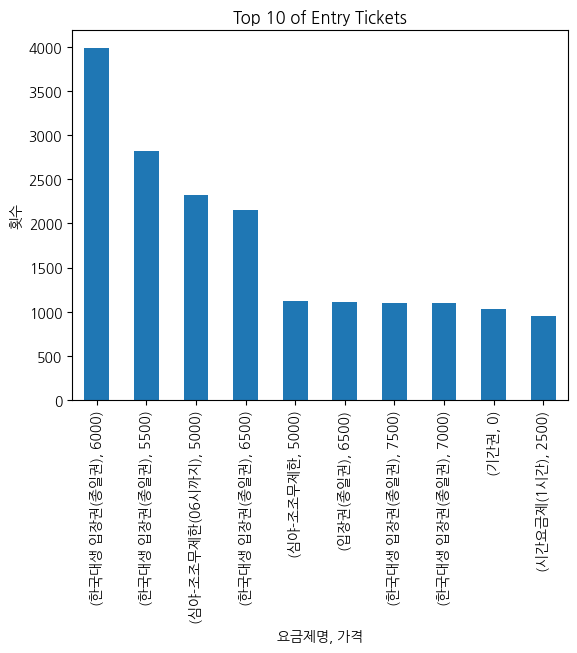

In [82]:
top_10.plot(kind = 'bar', rot = 90)

plt.title("Top 10 of Entry Tickets")
plt.xlabel("요금제명, 가격")
plt.ylabel("횟수")
plt.show() # print()와 비슷한 역할인듯.

### 내가 정의한 문제 해결  
인기 없는 상품 확인

In [84]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [85]:
temp = sales_data
temp

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [89]:
temp["상품명"].groupby(temp["판매수량"]).count()

판매수량
-1     160
 1    6945
Name: 상품명, dtype: int64

In [102]:
temp1 = temp[temp["판매수량"] != -1].value_counts()
temp1
#temp 데이터 프레임 안에서 temp의 판매수량 열기준으로 -1을 제외해주세요.

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date   
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10    4
                        라면          현금    결제완료  1     4000  customer803089  2021-10    4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10    4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06    4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06    3
                                                                                      ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06    1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06    1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06    1
2021-06-13 10:00  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer258946  2021-06    1
2022-04-01 19:41  선불기1  치킨

pandas.Series.value_counts  
Return a Series containing counts of unique values.


pandas.DataFrame.value_counts  
Return a Series containing counts of unique rows in the DataFrame.

In [106]:
temp1.info()
#AttributeError: 'Series' object has no attribute 'info'

AttributeError: 'Series' object has no attribute 'info'

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.groupby.html?highlight=series%20groupby#pandas.Series.groupby  
Series.groupby  
Group Series using a mapper or by a Series of columns.

In [105]:
temp1["상품명"].groupby(temp1["판매수량"], temp1["결제금액"])
#KeyError: '상품명'

KeyError: '상품명'

In [107]:
temp2 = temp1.groupby("상품명", "판매수량", "결제금액").sum()
temp2
#ValueError: No axis named 판매수량 for object type Series

ValueError: No axis named 판매수량 for object type Series

In [110]:
temp_f = temp1.to_frame
temp_f

<bound method Series.to_frame of 결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date   
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10    4
                        라면          현금    결제완료  1     4000  customer803089  2021-10    4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10    4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06    4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06    3
                                                                                      ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06    1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06    1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06    1
2021-06-13 10:00  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer258946  2021-0

In [113]:
type(temp_f)

method

In [114]:
temp_f[["상품명", "판매수량", "결제금액"]]
#TypeError: 'method' object is not subscriptable

TypeError: 'method' object is not subscriptable

In [116]:
temp1["상품명", "판매수량", "결제금액"]
#KeyError: '상품명'

KeyError: '상품명'

In [119]:
type(temp1)

pandas.core.series.Series

In [117]:
temp2 = temp1.groupby(["상품명"])[["판매수량", "결제금액"]].sum()
temp2
#AttributeError: 'Series' object has no attribute 'columns'

AttributeError: 'Series' object has no attribute 'columns'

In [134]:
temp1[0:5]

결제일시              판매위치  상품명   결제방식  비고    판매수량  결제금액  고객              date   
2021-10-05 13:33  선불기1  치즈추가  현금    결제완료  1     500   customer803089  2021-10    4
                        라면    현금    결제완료  1     4000  customer803089  2021-10    4
2021-10-07 10:05  선불기1  시럽추가  신용카드  결제완료  1     500   customer777135  2021-10    4
2021-06-19 21:02  선불기1  라면    신용카드  결제완료  1     4000  customer283589  2021-06    4
2021-06-14 11:37  선불기1  치즈추가  신용카드  결제완료  1     500   customer950393  2021-06    3
dtype: int64

이것 저것 테스트하다가 시간 및 능력 부족으로 인해서  
이전에 하였던 방식을 채택하여 진행하기로 결정했다.

In [142]:
temp3 = temp_var["상품명"].groupby(temp_var["판매수량"] <= 1).value_counts()
temp3.to_frame()

상품명
판매수량 상품명               
True 김치볶음밥         1211
     라면             756
     짜장라면           457
     치즈불고기볶음밥       423
     계란추가           315
...                 ...
     라면(계란/치즈추가)      1
     오늘은 한돈간장불고기      1
     오늘은 한돈고추장불고기     1
     이어폰(커널형)         1
     짜장라면(계란추가)       1

[100 rows x 1 columns]

In [149]:
temp4 = temp3[-10:]
temp4

판매수량  상품명         
True  커피쉐이크           3
      오늘은 순살닭다리 덮밥    2
      카라멜마끼아또(HOT)    2
      헤이즐넛라떼(HOT)     2
      녹차(HOT)         1
      라면(계란/치즈추가)     1
      오늘은 한돈간장불고기     1
      오늘은 한돈고추장불고기    1
      이어폰(커널형)        1
      짜장라면(계란추가)      1
Name: 상품명, dtype: int64

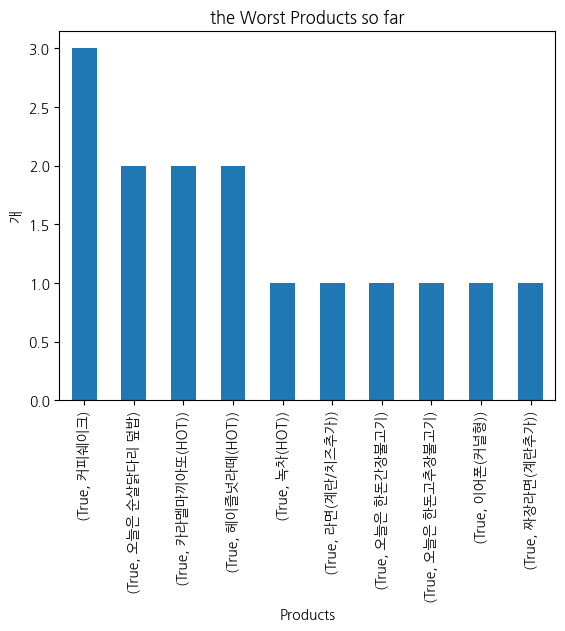

In [154]:
temp4.plot(kind = 'bar')

plt.title("the Worst Products so far")
plt.xlabel("Products")
plt.ylabel("개")
plt.show()

# 회고  
#### 과정
문제의 내용을 잘못 인지한다는 사실을 반나절이 걸려서 알게되었습니다.  
그래서 처음부터 다시 시작해보고 다음날이 밝아지게되어  
제한된 시간안에 제출을 해야한다는 생각에 원래 잘못 진행되었던 부분의 자료로 다시 이어나아가서 현재의 결과물이 나왔습니다.
1. temp_var의 pyament열을 date 기준으로 집계하기
개인적으로 뜬금없이 payment라는 말이 나와서 그전에 "결제금액"이란 열이 있기에 "결제금액"이라 인지했습니다. 낚시성의 단어로 의문이 들었기 때문입니다.

2. 집계
집계라는 단어가 무슨말인지 모르겠습니다.

저는 count로 인식하여서 count로 계산했거든요.  
하지만 원했던 것은 sum의 방식이였더라구요.

##### 국어사전 및 영어사전
국어사전, 영어사전을 통해서 집계라는 말을 조금은 인지했는데 상황에 따라서 의미가 변한다는 사실도 알게되었습니다. 
total count, aggregate, sum up  
集計 -> 이미 된 계산들을 한데 모아서 계산하다  
이미 된 계산들을 한데 모아서 그 계산들을 종합 시킨다. 라는 사실을 늦게 알게되었습니다.


3. 활용할 데이터(sales_data)를 temp_var로 정의하기 그 후 temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_vard에 변수에 넣으라고 인식해서 넣고나니  
다음 문제에 같은 변수 내용인데 왜 sales_date를 사용하라는 건지? 원본은 보존해야한다는 생각이 먼저 들었기에 이것도 낚시성으로 판단되어서 temp_var만 사용하였습니다.
나중에 알게된것은 문제 내용 그대로 써주길 바랬더라구요.



4. temp_var의 상품명을 value_counts를 이용해 집계하기(힌트 코드 : temp_var[temp_var['판매수량']==-1] )  
상품명과 판매수량 두개의 열만 깔끔하게 보여주길 원한다고 판단이 되어,  
힌트코드를 groupby안에 넣어서 해결하려고보니까 거의 3시간 이상의 시간을 소비하게되었습니다.

문제의 의도를 알게 된 후
문제의 의도는 상품명과 판매수량 같이 보여줄 필요는 없었다.  
결국 문제 내용에서 낚여버린거죠.  
저는 억지로 groupby 안에 힌트코드를 짚어 넣게 되었구요.


### 해결하고 싶은 문제
판매 부진 메뉴들을 확인 하고 싶었습니다.    
여러가지 시도는 해보았으나 결과가 미흡하여 기존에 사용했던 코드를 이용했습니다.  
-> temp_var["상품명"].groupby(temp_var["판매수량"] <= 1).value_counts()
1. 커피쉐이크           3  
2. 오늘은 순살닭다리 덮밥    2  
3. 카라멜마끼아또(HOT)    2  
4. 헤이즐넛라떼(HOT)     2  
5. 녹차(HOT)         1  
6. 라면(계란/치즈추가)     1  
7. 오늘은 한돈간장불고기     1  
8. 오늘은 한돈고추장불고기    1  
9. 이어폰(커널형)        1  
10. 짜장라면(계란추가)    

이러한 결과가 도출이 되어 해당 메뉴들을 제외 혹은 개선이 필요하다고 판단이 되어집니다.



##### 느낀점
이번 프로젝트를 통해서 많은 것을 느꼈습니다.
우선 3일의 진도 및 공부, 2일의 프로젝트 , 복습 및 구글링을 통한 시스템으로 운영이 되어지는 아이펠이다.  
개인적인 입장으로는 1주일동안 진도 및 공부 그리고 복습의 시간을 가지고  
다음주에 프로젝트 시간을 가져봤으면 조금 더 안정적이고 퀄리티 높은 프로젝트가 생성이 되고 머리 속에 더 많은 것이 남아있지 않았을까 개인적인 생각이 문득 들었다.  
이런 방식이 벼락치기의 느낌을 들기에  
결국, 머리 속에 남는 것이 별로 없다는 저 자신의 개인적인 입장이다.
그렇지만 아이펠 입장에서는 제안된 일정안에 저와 같은 입장의 방식이 다소 무리인듯하여 이런 일정을 채택하였다고 생각을 하게되어,  
다음 주는 이번 주의 경험을 바탕으로 하나하나에 목숨 걸지 말고 분산투자하여 조금 더 넓은 시야로 임하며 진도 및 복습 그리고 공부를 해야한다는 부분을 몸소 느꼈다.

좀 더 상세하게 적혀있길  
좀 더 다양한 예시가 적혀있길  
좀 더 다양한 활용방식도 적혀있길  
그런 lms 및 풀입스쿨 시간이길 기대하였으나  
결국, 내 자신이 이 환경에 맞춰야만 한다.



## 낚이지 말아야할 곳에 낚이고 낚일 필요 없는 곳에 낚인 약 1.5일 이였습니다.
###### P.S. pandas.core.series.Series 격하게 활용 및 사용 방식 알고 싶다.  